# Représenter les positions successives d’un système modélisé par un point lors d’une évolution unidimensionnelle ou bidimensionnelle

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Bille ponctuelle évoluant sur un rail (théorie)

### A vitesse constante
On considère une bille lancée à vitesse constante v, à partir d'un poitn x0 du rail, vers les x croissants.

In [2]:
# création des instants
t = np.linspace(0, 20, 10)

In [3]:
# vitesse
v = 10
# position initiale sur l'axe du rail
d0 = 70

In [4]:
# distance parcourue
d = v * t + d0

Text(0.5,1,'Distance parcourue au cours du temps')

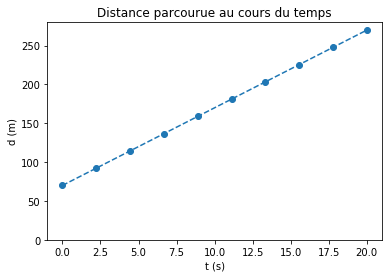

In [5]:
plt.plot(t, d, 'o--')
plt.xlabel('t (s)')
plt.ylabel('d (m)')
plt.axis(ymin=0)
plt.title('Distance parcourue au cours du temps')

### A vitesse croissante, accélération constante
On considère une bille lancée à accélération constante a, à partir de l'origine du rail sdans vitesse initiale, vers les x croissants.

- La vitesse croit linéairement : v = a . t
- la position croît de manière quadratique : d = 0.5 . a . t^2

In [6]:
# création des instants
t = np.linspace(0, 20, 20)

# accélération
a = 10

# distance parcourue au cours du temps
d = 0.5 * a * t**2

Text(0.5,1,'Distance parcourue au cours du temps')

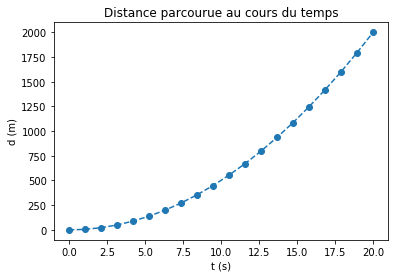

In [7]:
plt.plot(t, d, 'o--')
plt.xlabel('t (s)')
plt.ylabel('d (m)')
plt.title('Distance parcourue au cours du temps')

# Bille ponctuelle lâchée d'une hauteur h sans vitesse initiale (expérience)
On travaille avec des relevés de positions au cours du temps obtenus à partir du film d'une chute (ex : Regavi)

In [8]:
h0 = 2
h = [2, 1.94, 1.76, 1.44, 1.03, .49, 0]
t = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

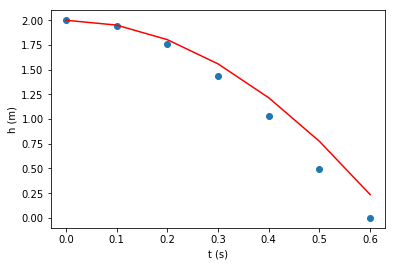

In [9]:
plt.plot(t, h, 'o')
plt.xlabel('t (s)')
plt.ylabel('h (m)')

# modélisation par une chute libre (courbe rouge)
g = 9.8
y = h0 - 0.5 * g * np.array(t)**2 # il faut convertir t en ndarray
plt.plot(t, y, color='red')

# Mouvement parabolique (théorie)
On considère une bille lancée d'une hauteur h, avec un angle alpha par rapport à l'horizontale, et une vitesse intiale v0.

In [10]:
# hauteur de lancement (m)
h = 5
# angle en degré, puis conversion en radians
alpha = 40
alpha = np.radians(alpha) 
# vitesse initiale (m/s)
v0 = 20
# intensité de la pesanteur (m/s2)
g = 9.8

In [11]:
# création des instants
t = np.linspace(0, 3, 30)

In [12]:
# coordonnées de positions (x, y) en fonction du temps
x = v0 * np.cos(alpha) * t

y = -0.5 * g * t**2 + v0 * np.sin(alpha) * t + h

# équation de la trajectoire
traj = -0.5 * g * (x / (v0 * np.cos(alpha)))**2 + np.tan(alpha) * x + h

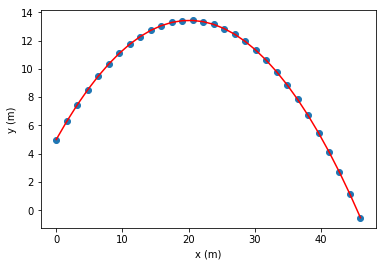

In [13]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.plot(x, traj, 'red')

# Tracer des vecteurs vitesse
On reprend les données précédentes du mouvement parabolique.

### Calcul des coordonnées (approximation discrète) du vecteur vitesse
vx[i] = (x[i+1] - x[i-1]) / (t[i+1] - t[i-1])

vy[i] = (y[i+1] - y[i-1]) / (t[i+1] - t[i-1])

On donne les valeurs suivantes "aux extrémités" :

vx[0] = (x[1] - x[0]) / (t[1] - t[0])

vx[-1] = (x[-1] - x[-2]) / (t[-1] - t[-2])

In [14]:
# calcul des coordonnées de v
vx = [(x[1] - x[0]) / (t[1] - t[0])]
for i in range(1, len(x)-1):
    vx.append((x[i+1] - x[i-1]) / (t[i+1] - t[i-1]))
vx.append((x[-1] - x[-2]) / (t[-1] - t[-2]))

vy = [(y[1] - y[0]) / (t[1] - t[0])]
for i in range(1, len(y)-1):
    vy.append((y[i+1] - y[i-1]) / (t[i+1] - t[i-1]))
vy.append((y[-1] - y[-2]) / (t[-1] - t[-2]))

### Tracé du vecteur vitesse
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html#matplotlib.pyplot.quiver

Remarques :
- il faut mettre le paramètres angles='xy' pour la vitesse (mais je ne comprends pas bien pourquoi...)
- plus le nombre 'scale' est petit et plus les flèches sont grandes, couplé au paramètre scale_units='xy'
- pour 'voir' correctement les vecteurs, il ne faut les tracer à tous les points


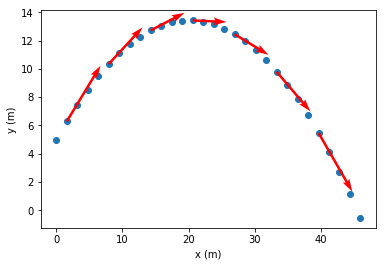

In [15]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

# ajout des vecteurs vitesse
# on ne conserve qu'un point sur 4 (pour la lisibilité), et on exclut le 1er et le dernier point
plt.quiver(x[1:-2:4], y[1:-2:4], vx[1:-2:4], vy[1:-2:4], scale=3, scale_units='xy', color='red', angles='xy')

### Hors-programme de 2nde : vecteur accélération
C'est hors-programme, mais ça vaut le coup de voir ce que ça donne...

In [16]:
# calcul des coordonnées de a
ax = [(vx[1] - vx[0]) / (t[1] - t[0])]
for i in range(1, len(vx)-1):
    ax.append((vx[i+1] - vx[i-1]) / (t[i+1] - t[i-1]))
ax.append((vx[-1] - vx[-2]) / (t[-1] - t[-2]))

ay = [(vy[1] - vy[0]) / (t[1] - t[0])]
for i in range(1, len(vy)-1):
    ay.append((vy[i+1] - vy[i-1]) / (t[i+1] - t[i-1]))
ay.append((vy[-1] - vy[-2]) / (t[-1] - t[-2]))

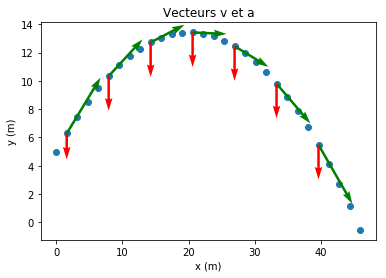

In [17]:
plt.title("Vecteurs v et a")
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

plt.quiver(x[1:-2:4], y[1:-2:4], vx[1:-2:4], vy[1:-2:4], scale=3, scale_units='xy', color='green', angles='xy')
plt.quiver(x[1:-2:4], y[1:-2:4], ax[1:-2:4], ay[1:-2:4], scale=4, scale_units='xy', color='red', angles='xy')

### Au programme de 2nde : variation de vecteur vitesse
C'est très similaire au paragraphe précédent.
La seule différence avec l'accélération est qu'on ne divise pas par le temps !

In [18]:
# calcul des coordonnées du vecteur variation de vitesse
Dvx = [vx[1] - vx[0]]
for i in range(1, len(vx)-1):
    Dvx.append(vx[i+1] - vx[i-1])
Dvx.append(vx[-1] - vx[-2])

Dvy = [vy[1] - vy[0]]
for i in range(1, len(vy)-1):
    Dvy.append(vy[i+1] - vy[i-1])
Dvy.append(vy[-1] - vy[-2])

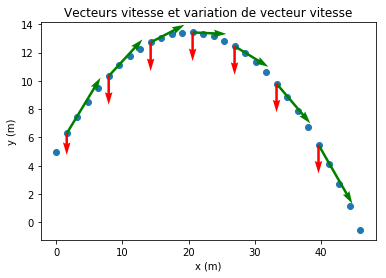

In [19]:
plt.title("Vecteurs vitesse et variation de vecteur vitesse")
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

plt.quiver(x[1:-2:4], y[1:-2:4], vx[1:-2:4], vy[1:-2:4], scale=3, scale_units='xy', color='green', angles='xy')
plt.quiver(x[1:-2:4], y[1:-2:4], Dvx[1:-2:4], Dvy[1:-2:4], scale=1, scale_units='xy', color='red', angles='xy')